STOCK MARKET PRIZE ANALYSIS 

EDA: EXPLORATORY DATA ANALYSIS

Reading the dataset

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv

df=pd.read_csv('stock.csv')
print(df)

              date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]


Generation of report using pandas-profiling

In [13]:
df.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [15]:
df.isnull()

date   open   high    low  close  volume   Name
0       False  False  False  False  False   False  False
1       False  False  False  False  False   False  False
2       False  False  False  False  False   False  False
3       False  False  False  False  False   False  False
4       False  False  False  False  False   False  False
...       ...    ...    ...    ...    ...     ...    ...
619035  False  False  False  False  False   False  False
619036  False  False  False  False  False   False  False
619037  False  False  False  False  False   False  False
619038  False  False  False  False  False   False  False
619039  False  False  False  False  False   False  False

[619040 rows x 7 columns]

In [16]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

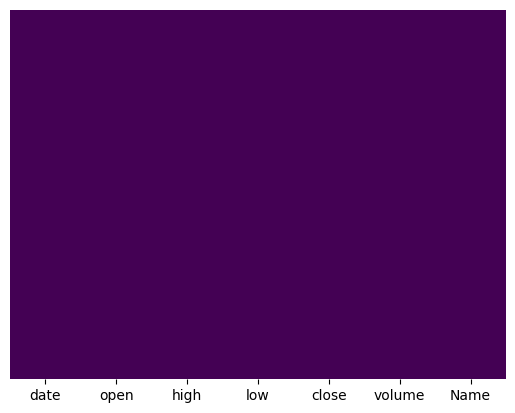

In [17]:
ax = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This plot indicates the noise present in the data set, as per the above calculations using ".isnull()" we come to know there is noise but as comapared to the size of the data set, the noise is negligible.

In [18]:
#drop nan rows
df = df.dropna()


In [19]:
# Check for duplicates
print(df.duplicated().sum())

0


In [20]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [21]:
# Rename columns
df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

In [22]:
# Handle outliers
q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = df[df['Close'] <= upper_bound]

In [23]:
#standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

Data Visualization

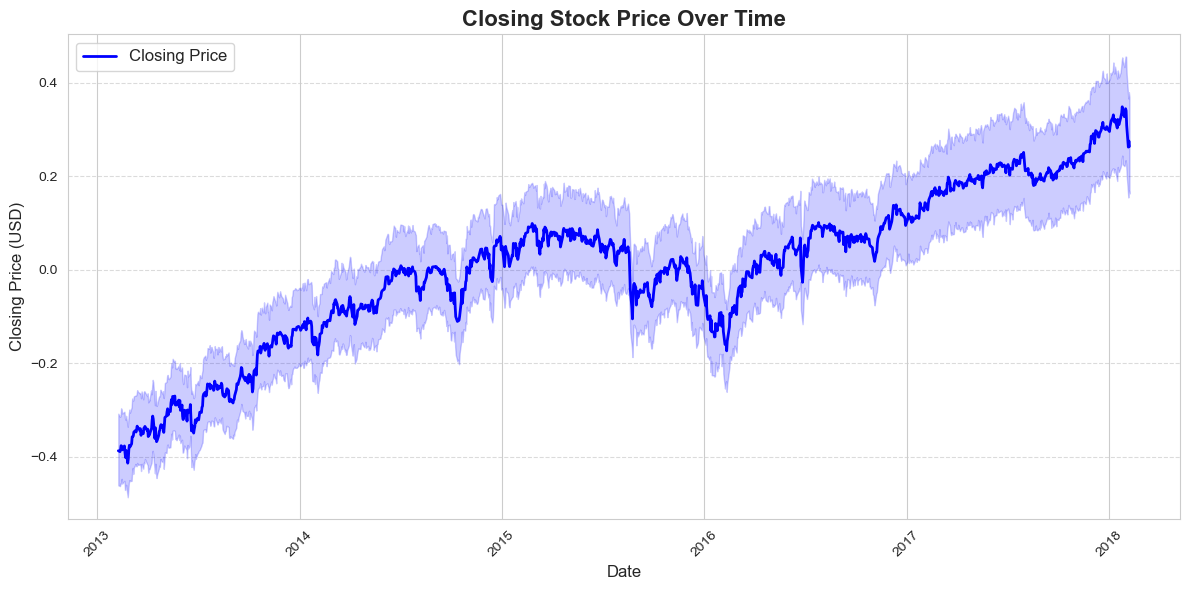

In [24]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Create the line chart
sns.lineplot(data=df, x='date', y='Close', color='blue', linewidth=2, label='Closing Price')
# Add title, labels, and legend
plt.title('Closing Stock Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
# Customize ticks and grid
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add a legend with a descriptive label
plt.legend(loc='upper left', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()

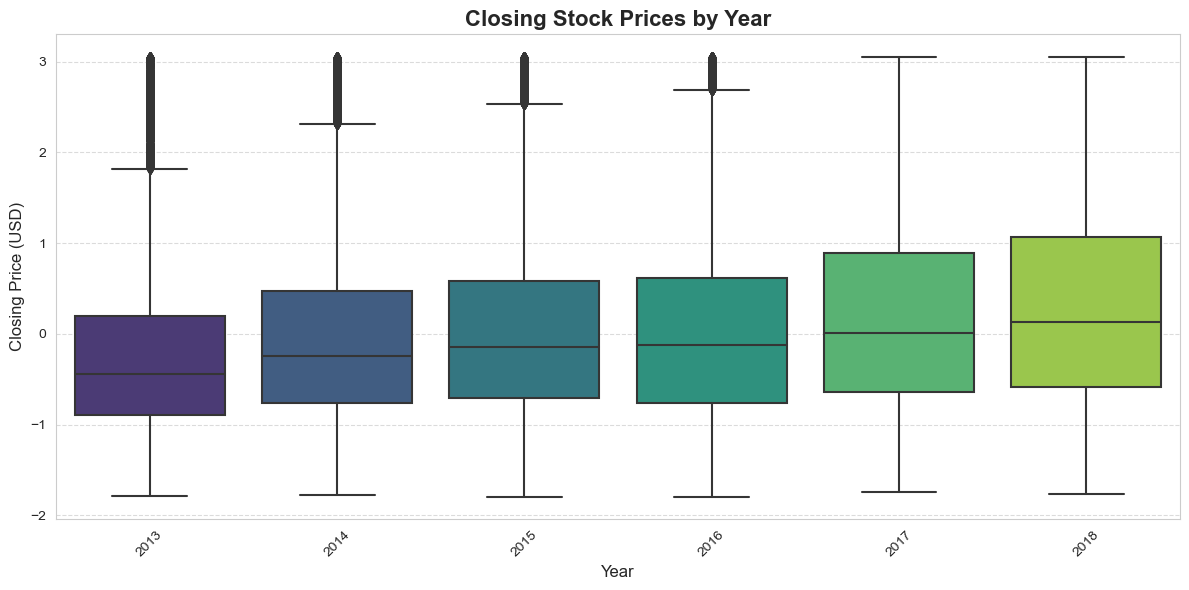

In [25]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Extract the year from the 'date' column and create a new 'Year' column
df['Year'] = df['date'].dt.year
# Create a box plot to visualize closing prices by year
sns.boxplot(data=df, x='Year', y='Close', palette='viridis')
# Add title and labels
plt.title('Closing Stock Prices by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
# Customize ticks and grid
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()


From the plot, we can see that the closing stock prices have generally increased over the years, with some outliers.

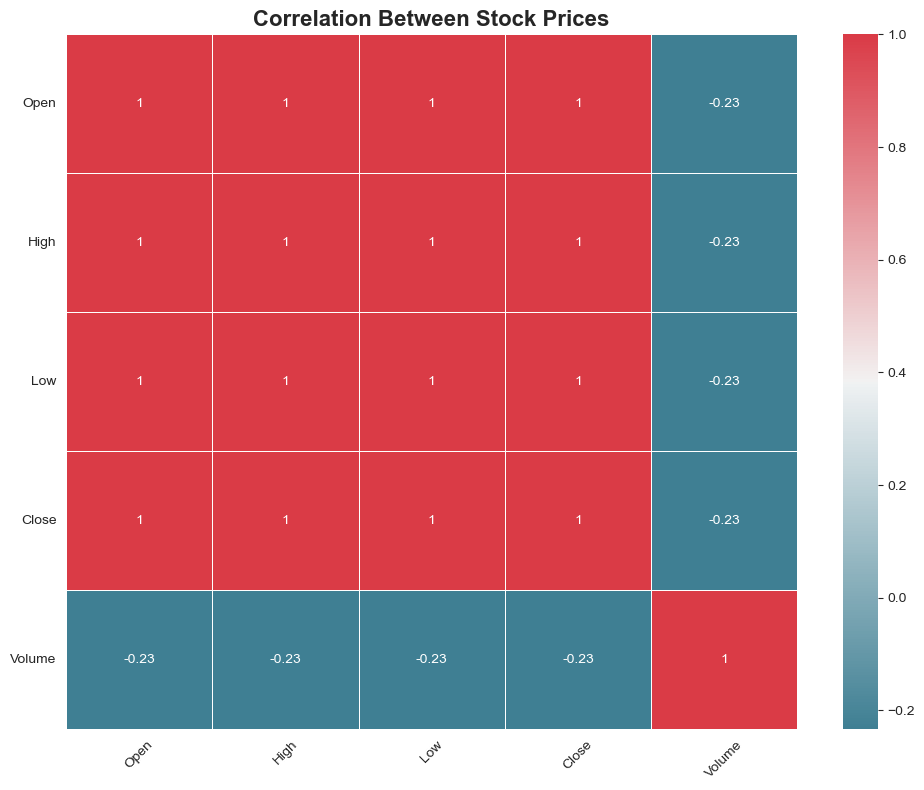

In [26]:
# Select only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
corr_matrix = numeric_columns.corr()
# Create a custom diverging color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Set the figure size
plt.figure(figsize=(10, 8))
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5)
# Add a title
plt.title('Correlation Between Stock Prices', fontsize=16, fontweight='bold')
# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# Show the plot
plt.tight_layout()
plt.show()


we can see that the opening and closing prices have a strong positive correlation, while the low and high prices have a weaker positive correlation.

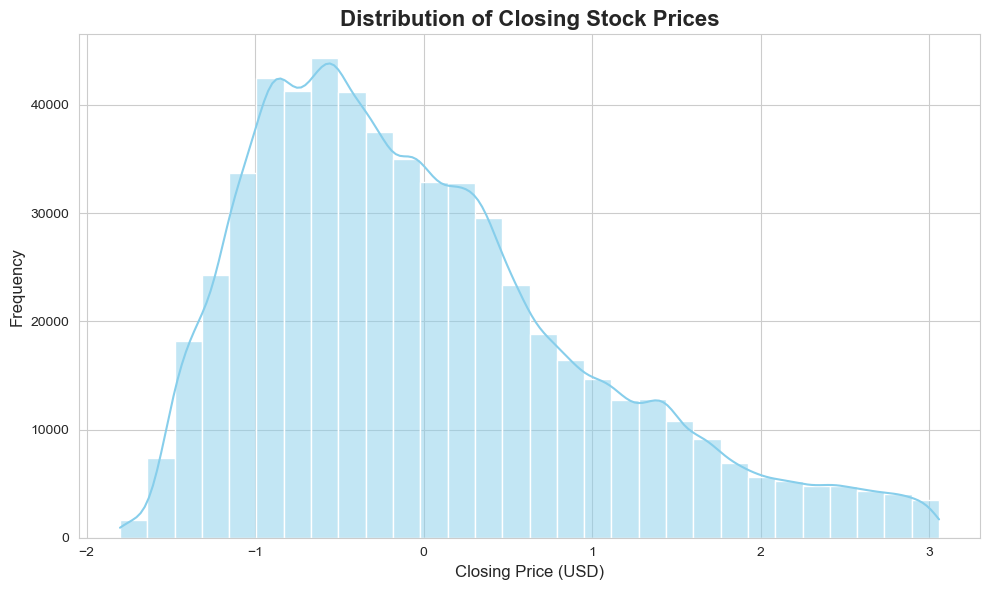

In [27]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# Create a combined histogram and kernel density plot
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')
# Add title and labels
plt.title('Distribution of Closing Stock Prices', fontsize=16, fontweight='bold')
plt.xlabel('Closing Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()


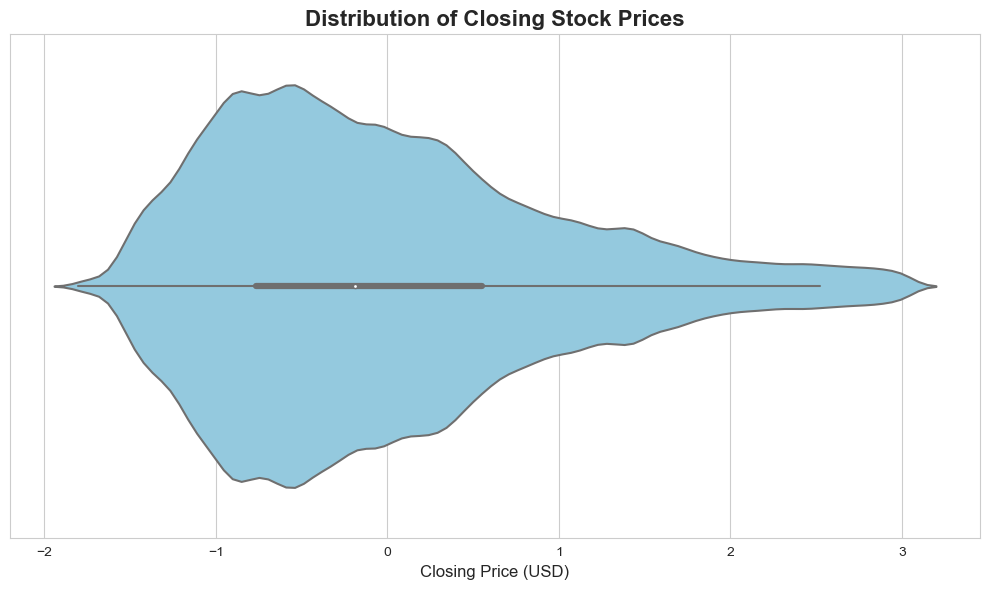

In [28]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# Create a violin plot of the closing stock prices
sns.violinplot(x='Close', data=df, color='skyblue')
# Add a title and label
plt.title('Distribution of Closing Stock Prices', fontsize=16, fontweight='bold')
plt.xlabel('Closing Price (USD)', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()


It shows the distribution of closing stock prices, including the quartiles, median, and the probability density

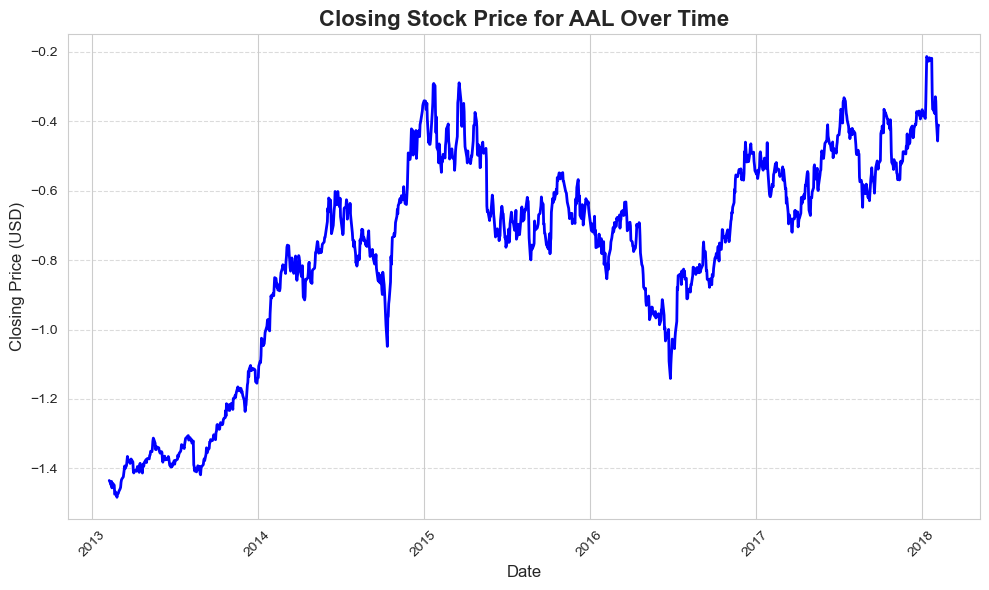

In [29]:
# Choose a specific company (replace 'Company Name' with the actual company name)
company_name = 'AAL'
# Filter the DataFrame to include only the data for the selected company
company_df = df[df['Name'] == company_name]
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# Create the line chart
sns.lineplot(data=company_df, x='date', y='Close', color='blue', linewidth=2)
# Add title and labels
plt.title(f'Closing Stock Price for {company_name} Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
# Customize ticks and grid
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()


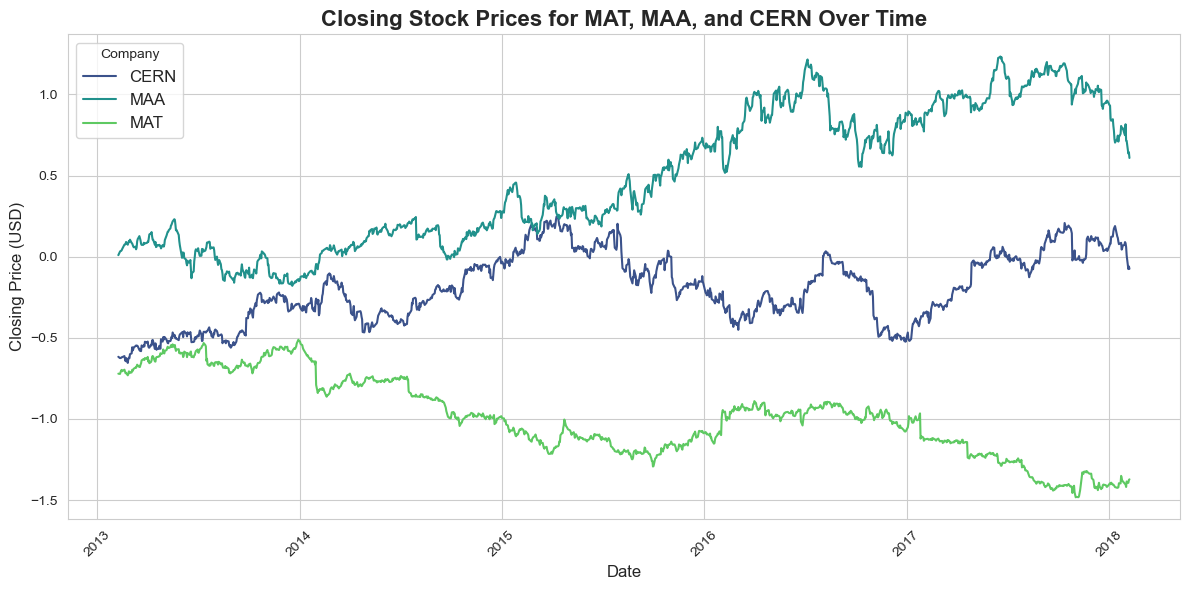

In [30]:
# List of companies to visualize
companies_to_visualize = ['MAT', 'MAA', 'CERN']
# Filter the DataFrame to include only the data for the selected companies
filtered_df = df[df['Name'].isin(companies_to_visualize)]
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Create a line chart for all three companies at once using 'hue'
sns.lineplot(data=filtered_df, x='date', y='Close', hue='Name', palette='viridis')
# Add title and labels
plt.title('Closing Stock Prices for MAT, MAA, and CERN Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
# Customize ticks and legend
plt.xticks(rotation=45)
plt.legend(title='Company', loc='upper left', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()


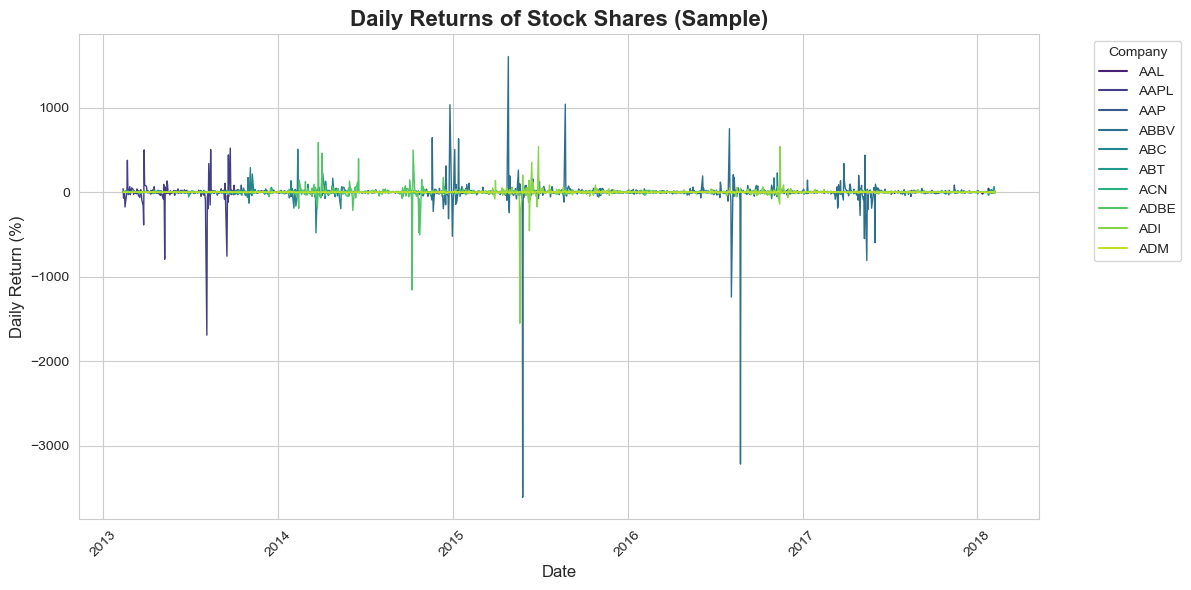

In [31]:
# Calculate daily returns for all companies
df['Daily_Return'] = df.groupby('Name')['Close'].pct_change() * 100
# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Create the line chart for daily returns for a sample of companies
sample_companies = df['Name'].unique()[:10]  # Adjust the number of companies to display as needed
filtered_df = df[df['Name'].isin(sample_companies)]
# Define a custom color palette for the lines
colors = sns.color_palette("viridis", len(sample_companies))
# Create the line chart
sns.lineplot(data=filtered_df, x='date', y='Daily_Return', hue='Name', palette=colors, lw=1)
# Add title and labels
plt.title('Daily Returns of Stock Shares (Sample)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
# Customize ticks
plt.xticks(rotation=45)
# Move the legend outside the plot to the right
plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
# Show the plot
plt.tight_layout()
plt.show()


The line chart will show the percentage change in price from one day to the next.

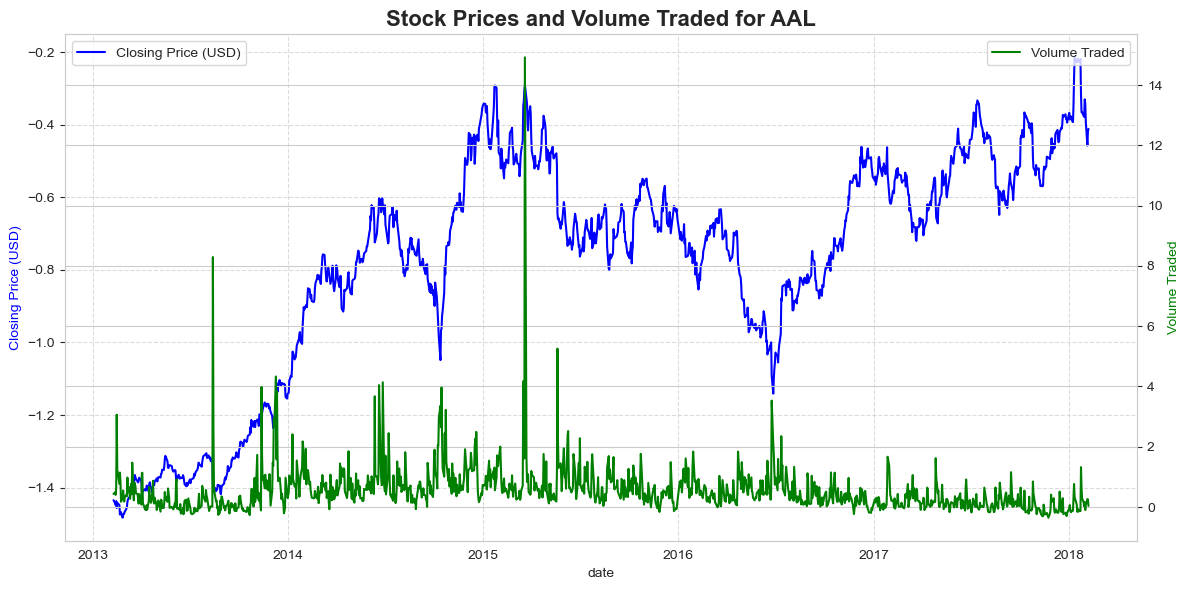

In [32]:
# Choose a specific company (replace 'Company Name' with the actual company name)
company_name = 'AAL'
# Filter the DataFrame to include only the data for the selected company
company_df = df[df['Name'] == company_name]
# Set the figure size
plt.figure(figsize=(12, 6))
# Create the left y-axis for stock prices
ax1 = sns.lineplot(data=company_df, x='date', y='Close', color='blue', label='Closing Price (USD)')
# Set the y-axis label for stock prices
ax1.set_ylabel('Closing Price (USD)', color='blue')
# Create the right y-axis for volume traded
ax2 = ax1.twinx()
sns.lineplot(data=company_df, x='date', y='Volume', color='green', label='Volume Traded', ax=ax2)
# Set the y-axis label for volume traded
ax2.set_ylabel('Volume Traded', color='green')
# Add title and legend
plt.title(f'Stock Prices and Volume Traded for {company_name}', fontsize=16, fontweight='bold')
# Customize ticks
plt.xticks(rotation=45)
# Customize grid lines
ax1.grid(True, linestyle='--', alpha=0.7)
# Move the legend outside the plot to the upper right
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Show the plot
plt.tight_layout()
plt.show()


Overall, the visualizations showed that the S&P 500 index has steadily grown over time, with some periods of volatility. The returns of individual companies have also varied, with some outperforming the index, and others underperforming.

ANN and CNN

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the input shape (number of features)
input_shape = 5  # There are 5 input features: 'open', 'high', 'low', 'close', 'volume'

# Define the number of output units (1 for regression)
output_units = 1

# Initialize the model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(input_shape,)))

# Hidden layers (you can customize the architecture)
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))

# Output layer
model.add(layers.Dense(units=output_units, activation='linear'))  # Use 'linear' for regression



In [34]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [35]:
# Display the model summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Train the model
from sklearn.model_selection import train_test_split
# Assuming 'close' is your target variable, and the other columns are features
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the DataFrames to NumPy arrays (optional)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()



In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [38]:
# use tenserflow library to train and define the model (Neural Network Model)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(units=64, activation='relu'),  # Hidden layer with ReLU activation
    tf.keras.layers.Dense(units=32, activation='relu'),  # Hidden layer with ReLU activation
    tf.keras.layers.Dense(units=1, activation='linear')  # Output layer for regression
])

In [39]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2433 (9.50 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25

14503/14503 [==============================] - 27s 2ms/step - loss: 0.0012 - val_loss: 1.8578e-04
Epoch 2/25
14503/14503 [==============================] - 18s 1ms/step - loss: 2.1192e-04 - val_loss: 1.4272e-04
Epoch 3/25
14503/14503 [==============================] - 17s 1ms/step - loss: 1.9096e-04 - val_loss: 1.6617e-04
Epoch 4/25
14503/14503 [==============================] - 18s 1ms/step - loss: 1.7735e-04 - val_loss: 1.4985e-04
Epoch 5/25
14503/14503 [==============================] - 19s 1ms/step - loss: 1.7680e-04 - val_loss: 2.3456e-04
Epoch 6/25
14503/14503 [==============================] - 20s 1ms/step - loss: 1.7138e-04 - val_loss: 1.3499e-04
Epoch 7/25
14503/14503 [==============================] - 20s 1ms/step - loss: 1.6768e-04 - val_loss: 1.7957e-04
Epoch 8/25
14503/14503 [==============================] - 24s 2ms/step - loss: 1.6924e-04 - val_loss: 1.3641e-04
Epoch 9/25
14503/14503 [==============================] - 18s 1ms/step - loss: 1.6747e-04 - val_los

In [41]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

3626/3626 [==============================] - 3s 950us/step - loss: 1.3575e-04
Test Loss: 0.0001357460714643821


In [43]:
# Make predictions
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")

3626/3626 [==============================] - 4s 1ms/step
Predictions: [[-0.69318616]
 [-0.29671398]
 [ 1.1276525 ]
 ...
 [ 0.96745574]
 [-0.8811165 ]
 [-1.1820117 ]]


In [61]:
# Make predictions for all 10 days
predictions = model.predict(X_test)

# Print all the predicted values for the next 10 days
print("Predictions for the next 10 days:")
for day, prediction in enumerate(predictions, start=1):
    print(f"Day {day}: {prediction[0]}")


3626/3626 [==============================] - 3s 830us/step
Predictions for the next 10 days:
Day 1: -0.6931861639022827
Day 2: -0.2967139780521393
Day 3: 1.1276525259017944
Day 4: -0.8030308485031128
Day 5: 1.9369564056396484
Day 6: -0.7964037656784058
Day 7: -0.6810678243637085
Day 8: 1.4017618894577026
Day 9: 0.3334953784942627
Day 10: -0.8676141500473022
Day 11: -0.279666543006897
Day 12: -0.2821536660194397
Day 13: -1.1331052780151367
Day 14: -0.27324944734573364
Day 15: 0.3451731204986572
Day 16: -1.2275816202163696
Day 17: 0.33726638555526733
Day 18: 0.8107805252075195
Day 19: -1.2009714841842651
Day 20: 0.4175637364387512
Day 21: 0.7434588670730591
Day 22: 0.060221895575523376
Day 23: -0.4502243101596832
Day 24: 0.2993733584880829
Day 25: -0.5391719341278076
Day 26: -0.9561355113983154
Day 27: 0.22185494005680084
Day 28: -1.5167319774627686
Day 29: 0.9210559129714966
Day 30: -0.18600714206695557
Day 31: 0.035676151514053345
Day 32: -0.19713333249092102
Day 33: 2.106785297393799


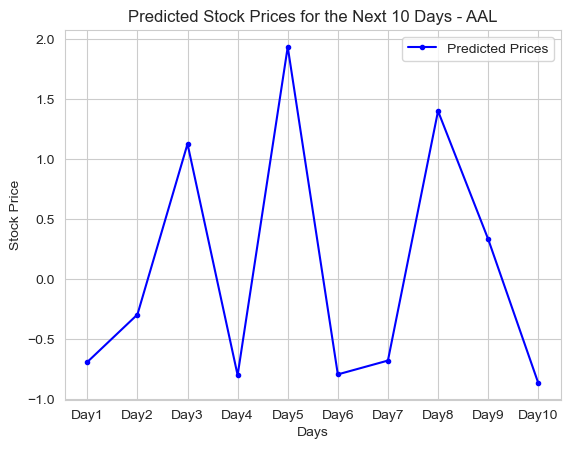

In [62]:
import matplotlib.pyplot as plt

# Assuming predictions is your array of predicted values for all days
# Assuming company_name is the name of the company

# Generate x-axis labels for the next 10 days
days = ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10']

# Plot only the predicted values for the next 10 days
plt.plot(predictions[:10], marker='.', linestyle='-', color='blue', label='Predicted Prices')
plt.title(f'Predicted Stock Prices for the Next 10 Days - {"AAL"}')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.xticks(range(10), days)
plt.grid(True)
plt.legend()
plt.show()
